In [1]:
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Flatten
from tensorflow.keras.utils import to_categorical
from keras import regularizers
from matplotlib import pyplot as plt
from sklearn.metrics import confusion_matrix
import numpy as np
import seaborn as sns


Load the MNIST dataset

In [2]:
(train_data,train_target),(test_data,test_target) = mnist.load_data()

Visualize the dataset

Target labels:  [9 8 0 7 1 3 8 5 7 5]


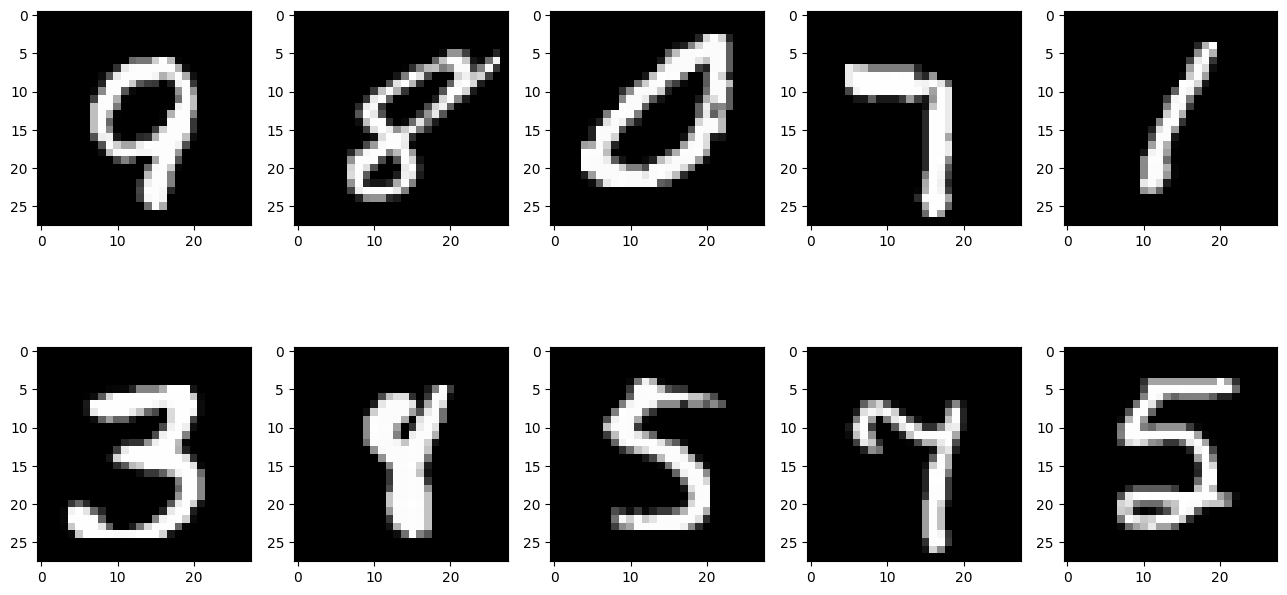

In [3]:
fig, axs = plt.subplots(2, 5, figsize=(16,8))
random_numbers = np.random.randint(0, 60000, 10)
print('Target labels: ',train_target[random_numbers])
for idx, ax in enumerate(axs.ravel()):
    ax.imshow(train_data[random_numbers[idx]],cmap='gray')
plt.show()

Pre-processing stage

In [4]:
new_train_data = train_data/255.0
new_test_data=test_data/255.0

new_train_target = to_categorical(train_target)
new_test_target = to_categorical(test_target)

Create the Model architecture

In [5]:
model=Sequential()

model.add(Flatten(input_shape=(28,28)))

model.add(Dense(64,activation='relu', kernel_regularizer=regularizers.l1_l2(l1=0.0001, l2=0.0001)))
model.add(Dense(64,input_dim=64,activation='relu', kernel_regularizer=regularizers.l1_l2(l1=0.0001, l2=0.0001)))
model.add(Dense(32,input_dim=64,activation='relu', kernel_regularizer=regularizers.l1_l2(l1=0.0001, l2=0.0001)))
model.add(Dense(10,input_dim=32,activation='softmax', kernel_regularizer=regularizers.l1_l2(l1=0.0001, l2=0.0001)))
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

In [6]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 64)                50240     
                                                                 
 dense_1 (Dense)             (None, 64)                4160      
                                                                 
 dense_2 (Dense)             (None, 32)                2080      
                                                                 
 dense_3 (Dense)             (None, 10)                330       
                                                                 
Total params: 56810 (221.91 KB)
Trainable params: 56810 (221.91 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


Train the model

In [7]:
"""
initial epochs was 10
after 20 epochs accuracy drops 20 was the highest
"""
train_info = model.fit(new_train_data , new_train_target , epochs = 20)

Epoch 1/20
1875/1875 [==============================] - 6s 3ms/step - loss: 0.5104 - accuracy: 0.9071
Epoch 2/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3278 - accuracy: 0.9559
Epoch 3/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2903 - accuracy: 0.9641
Epoch 4/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2700 - accuracy: 0.9678
Epoch 5/20
1875/1875 [==============================] - 5s 2ms/step - loss: 0.2562 - accuracy: 0.9714
Epoch 6/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2472 - accuracy: 0.9721
Epoch 7/20
1875/1875 [==============================] - 5s 2ms/step - loss: 0.2352 - accuracy: 0.9746
Epoch 8/20
1875/1875 [==============================] - 5s 2ms/step - loss: 0.2306 - accuracy: 0.9750
Epoch 9/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2232 - accuracy: 0.9763
Epoch 10/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.218

Plot the loss and accuracy graphs

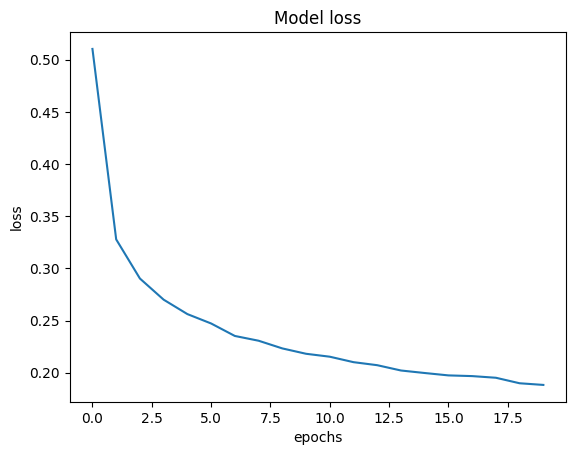

In [8]:
plt.plot(train_info.history['loss'])
plt.xlabel('epochs')
plt.ylabel('loss')
plt.title('Model loss')
plt.show()

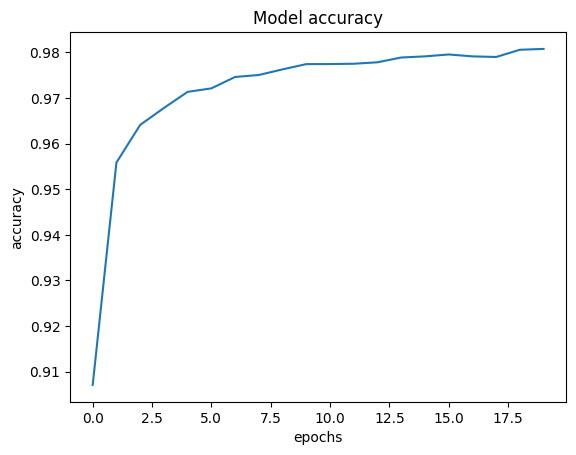

In [9]:
plt.plot(train_info.history['accuracy'])
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.title('Model accuracy')
plt.show()

Test the performance of Model

In [10]:
loss, acc = model.evaluate(new_test_data , new_test_target)
print(f'Loss of the Test dataset is: {loss}\nAccuracy of the test dataset is: {acc}')

313/313 [==============================] - 1s 2ms/step - loss: 0.2181 - accuracy: 0.9714
Loss of the Test dataset is: 0.21806347370147705
Accuracy of the test dataset is: 0.9714000225067139


Visualize using confusion matrix

313/313 [==============================] - 1s 2ms/step


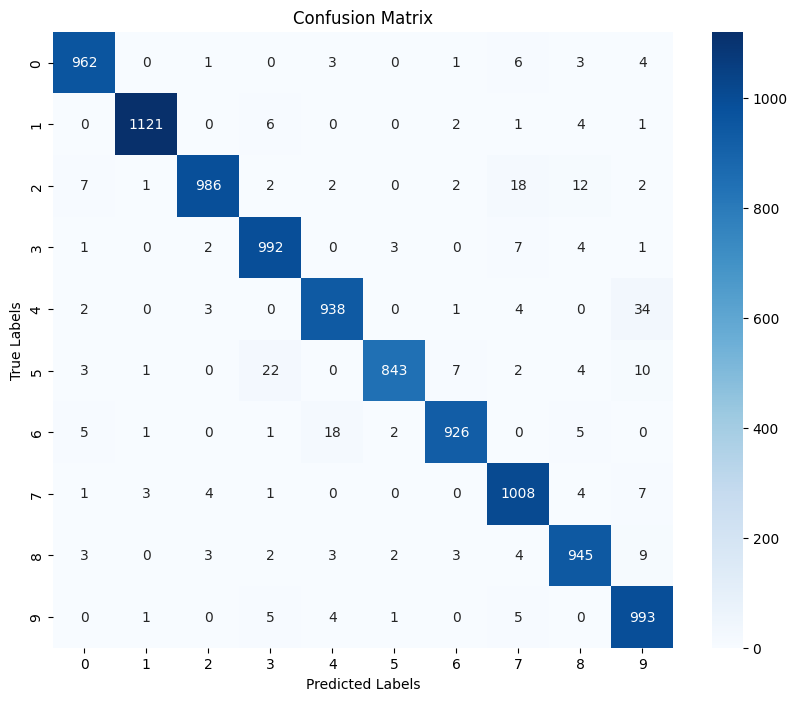

In [11]:
# Get predictions from the model
predictions = model.predict(new_test_data)
predicted_labels = np.argmax(predictions, axis=1)

# Create confusion matrix
conf_matrix = confusion_matrix(test_target, predicted_labels)

# Plot the confusion matrix using seaborn
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=range(10), yticklabels=range(10))
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

Save the model weights

In [12]:
model.save_weights('MNIST_WEIGHTS_V1.h5')